#Cross Validation

##KFold

https://velog.io/@hhhs101/%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9DK-foldStratified-k-fold

https://bbdata.tistory.com/10

교차검증이란 말그대로 훈련데이터를 교차로 바꿔가면서 훈련의 정확도를 보는것이다

KFold 는 가장 보편적으로 사용되는 교차검증 중 하나이다

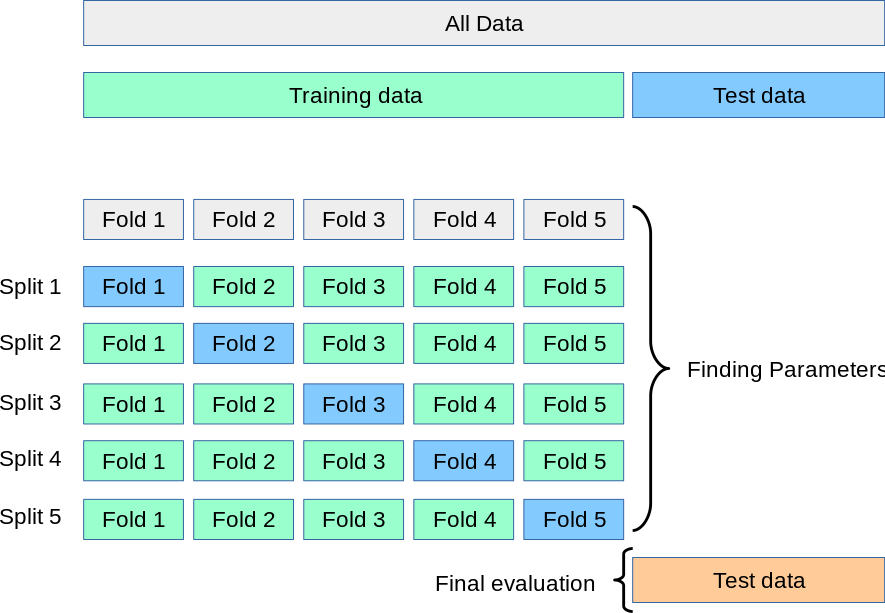

K-Fold는 K개의 fold를 만들어서 진행하는 교차검증이다

일반적으로 사용되는 교차 검증 방법 중 하나로, Training set과 Validation을 여러번 나눈 뒤 모델의 학습을 검증한다.

보통 회귀 모델에 사용되고, 데이터가 독립적이고 동일한 분포를 가질 때 사용한다. 위 그림에서는 데이터를 K등분(5등분)한 뒤, 1/5를 검증데이터로 나머지 4/5를 학습데이터로 나눈다. 

각각의 1/5를 검증데이터로 바꾸며 성능을 평가한다. 그 결과 총 5개의 성능 결과가 나올 것이고 5개의 평균을 학습 모델의 성능이라 판단한다.



## Stratified K-Fold

데이터가 편향돼있는경우엔 K-Fold를 사용했을때 성능 평가가 잘 되지 않을수 있다.

따라서 이럴땐 stratified K-Fold CV를 사용한다

한마디로 보편적인 상황에서는 K-Fold를 사용하나 불균형한 Dataset에서는 Stratified K-Fold를 사용하는것이다

 Stratified K-Fold 는 target데이터의 비율을 일정하게 유지하며, 교차 검증을 진행한다

K-Fold 는 train,validation 을 random하게 나눠주게 되므로 그 비율이 어긋날수도 있다 그렇게 되면 당연히 검증이 제대로 이루어지지 않게될것이다 
일반적으로 데이터가 imbalace한 경우 train, validation셋의 label의 비율이 어긋나게 될것이다

Stratified K-Fold는 원본 데이터에서 레이블 분포를 먼저 고려한뒤, 이 분포와 동일하게 학습 및 검증 데이터 세트를 분배한다 
때문에 imbalance 한 training set에서 비율에 맞게 train, validation 셋을 나눌수 있다

일반적으로 회귀에는 기본 k-겹 교차검증을 사용하고, 분류에는 StratifiedKFold를 사용한다.



##Group KFold

https://woolulu.tistory.com/71

https://velog.io/@hhhong/Cross-validation

* 레이블에 기반한 Group KFold 분할


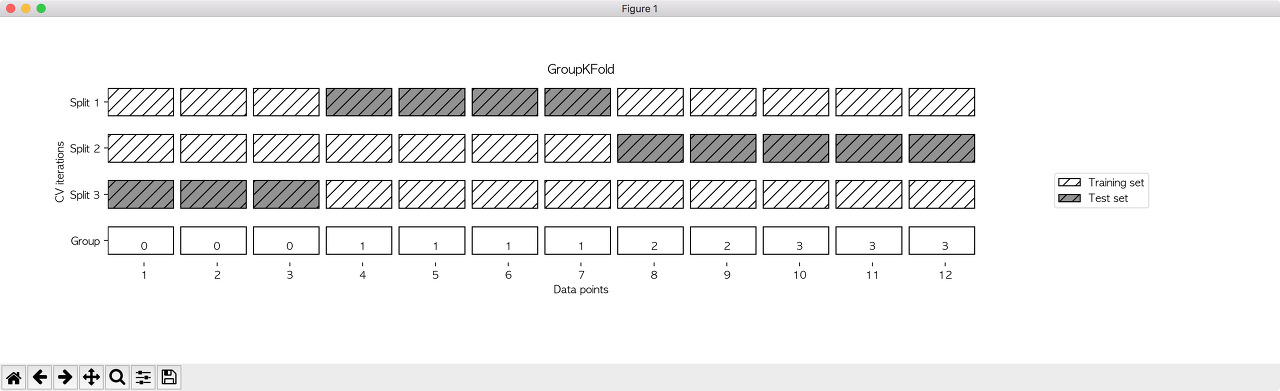

위 그림에서 볼수있듯이 각 분할에서 한 그룹 전체가 훈련세트 아니면 테스트 세트에 있다

데이터 안에 매우 연관된 그룹이 있을떄도 교차 검증을 사용한다

<<얼굴 사진에서 표정을 인식하는 시스템을 만들기 위해 100명의 사진을 모았다고 가정>>

한 사람을 찍은 여러장의 사진이 각기 다른 표정을 담고있다 => 이 데이터 셋에 없는 사람의 표정을 정확히 구분할수있는 분류기를 만드는것이 목표

같은 사람의 사진이 훈련 세트와 테스트 세트에 모두 나타날수 있으므로 그룹별 교차 검증을 하는것이 타당하다

새얼굴에 대한 일반화 성능을 더 정확하게 평가하려면 훈련 세트와 테스트 세트에 서로 다른 사람의 사진이 들어가도록 해야한다

이를 위해 사진의 사람이 누구인지 기록한 배열을  groups 매개변수로 전달 받을수있는 GroupKFold를 사용할수 있다

groups 배열은 훈련 세트와 테스트 세트를 만들때 분리되지 않아야 할 그룹을 지정하는것이라 클래스 레이블과는 다르다


일반적인 예를는 의료분야가 있다

여기서는 같은 환자로 부터 얻은 여러 샘플을 가지고 새로운 환자에게 일반화 하는것이 목적

비슷하게 음성인식에서도 데이터셋에 같은 사람의 목소리가 여러개 녹음되어 있을수 있으며, 관심사항은 새로운 사람의 대화를 인식하는것이다



In [ ]:
from sklearn.model_selection import GroupKFold
import numpy as np

X = np.array([0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10])
y = np.array(["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"])
groups = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3, 3])

gkf = GroupKFold(n_splits=3)
gkf.get_n_splits(X, y, groups)
for train_index, test_index in gkf.split(X, y, groups=groups):
    print("%s %s" % (train_index, test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)


[0 1 2 3 4 5] [6 7 8 9]
[0.1  0.2  2.2  2.4  2.3  4.55] [ 5.8  8.8  9.  10. ] ['a' 'b' 'b' 'b' 'c' 'c'] ['c' 'd' 'd' 'd']
[0 1 2 6 7 8 9] [3 4 5]
[ 0.1  0.2  2.2  5.8  8.8  9.  10. ] [2.4  2.3  4.55] ['a' 'b' 'b' 'c' 'd' 'd' 'd'] ['b' 'c' 'c']
[3 4 5 6 7 8 9] [0 1 2]
[ 2.4   2.3   4.55  5.8   8.8   9.   10.  ] [0.1 0.2 2.2] ['b' 'c' 'c' 'c' 'd' 'd' 'd'] ['a' 'b' 'b']


각 그룹은 다른 test fold에 있고, 같은 그룹은 test나 train에 동시에 포함되지 않는다. 즉, 두 개의 다른 폴드에 동일한 그룹이 나타나지 않는다.

이때 fold들은 데이터의 불균형 때문에 모두 정확히 같은 크기로 나누어지지 않는다는 점을 주의하자.


##cross_val_score

cross_val_score( ) 함수는 교차 검증을 쉽게 하기 위한 함수이다.

cross_val_score( 알고리즘, 피쳐 데이터 세트, 레이블 데이터 세트, 스코어링 기준, 폴드수(cv) ) 형태로 쓰기 때문에, 교차 검증의 컨트롤이 쉬워진다.

 

## GridSearchCV

https://rudolf-2434.tistory.com/10

GridSearchCV 란?

사이킷런에서는 분류 알고리즘이나 회귀 알고리즘에 사용되는 하이퍼파라미터를 순차적으로 입력해 학습을 하고 측정을 하면서 가장 좋은 파라미터를 알려준다. GridSearchCV가 없다면 max_depth 가 3일때 가장 최적의 스코어를 뽑아내는지 1일때 가장 최적인 스코어를  뽑아내는지 일일이 학습을 해야 한다. 하지만 grid 파라미터 안에서 집합을 만들고 적용하면 최적화된 파라미터를 뽑아낼 수 있다.

GridSearchCV 클래스의 생성자 정리

-estimator : classifier, regressor, pipeline 등 가능

-param_grid : 튜닝을 위해 파라미터, 사용될 파라미터를 dictionary 형태로 만들어서 넣는다.

-scoring : 예측 성능을 측정할 평가 방법을 넣는다. 보통 accuracy 로 지정하여서 정확도로 성능 평가를 한다.

-cv : 교차 검증에서 몇개로 분할되는지 지정한다.

-refit : True가 디폴트로 True로 하면 최적의 하이퍼 파라미터를 찾아서 재학습 시킨다.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

iris_data = load_iris()
label = iris_data.target
data = iris_data.data

X_train, X_val, y_train, y_val = train_test_split(data, label, test_size=0.2)


# GridSearchCV의 param_grid 설정
params = {
    'max_depth': [2, 3],
    'min_samples_split': [2, 3]
}

dtc = DecisionTreeClassifier()

grid_tree = GridSearchCV(dtc, param_grid=params, cv=3, refit=True)
grid_tree.fit(X_train, y_train)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)
em = grid_tree.best_estimator_
pred = em.predict(X_val)
accuracy_score(y_val, pred)


best parameters :  {'max_depth': 3, 'min_samples_split': 2}
best score :  0.9583333333333334


0.9666666666666667

#K-최근접 이웃(K-Nearest Neighbor)


K-최근접 이웃(K-Nearest Neighbor)은 새로운 데이터를 입력 받았을 때, 해당 데이터와 가장 가까이에 있는(이웃) k개의 데이터를 확인해 더 많은 데이터가 포함되어 있는 범주로 분류하는 방식이다.

K-최근접 이웃의 경우 회귀와 분류를 모두 지원한다

K-최근접 이웃이 뭔지 예시를 보며 더 자세히 확인해보자

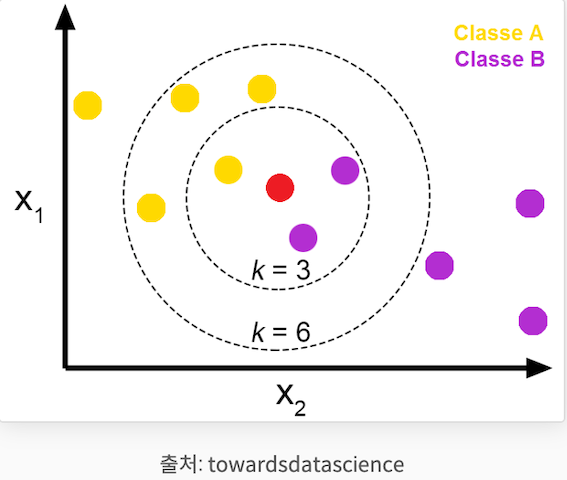

새로운 데이터가 주어졌을 때 (빨간 점) 이를 Class A로 분류할지, Class B로 분류할지 판단하는 문제다. 

해당 데이터와 가장 가까이에 있는(이웃) k개의 데이터를 확인해 주변 데이터가 더 많이 포함돼있는 (클래스)범주로 분류하면 된다

위 예시에서 k=3일때 빨간 점 주변에 Class A (노란색 점) 1개와 Class B (보라색 점) 2개가 있다. 따라서 k=3일때는 해당 데이터가 Class B (보라색 점)으로 분류된다.
 
그럼 k=6일때는? 똑같이 하면 된다 빨간 점 주변에 Class A (노란색 점) 4개와 Class B (보라색 점) 2개가 있으므로 k=6일때는 해당 데이터가 Class A (노란색 점)으로 분류된다.

즉, k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과가 되며 K를 어떻게 정하냐에 따라 결과 값이 바뀔 수 있다. 

K가 너무 작아서도 안 되고, 너무 커서도 안 된다. K의 default 값은 5이고 일반적으로 K는 홀수를 사용해야된다 짝수일 경우 동점이 되어 하나의 결과를 도출할 수 없기 때문이다.(뭐 방법이 없는건 아니겠지만 그래도 웬만하면 홀수를 사용하자^^)

## 예제

In [ ]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix


### 분류(붓꽃 데이터)

In [ ]:
iris = load_iris()

In [ ]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9583333333333334
평가 데이터 점수: 1.0


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.325
평가 데이터 점수: 0.36666666666666664


In [ ]:
#검증과정
cross_validate(
    estimator=KNeighborsClassifier(),
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00134182, 0.0011723 , 0.00107932, 0.00107574, 0.00098085]),
 'score_time': array([0.00466204, 0.00286984, 0.00285435, 0.00272155, 0.00210881]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [ ]:
param_grid = [{'n_neighbors':[3, 5, 7],
               'weights':['uniform', 'distance'],
               'algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(
  estimator=KNeighborsClassifier(),
  param_grid=param_grid,
  n_jobs=multiprocessing.cpu_count(),
  verbose=True
)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [ ]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [ ]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9800000000000001


In [ ]:
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy
  
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx,yy, Z, **params)

  return out

In [ ]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [ ]:

iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,-22.941755,12.112033,0
1,-25.414154,10.763578,0
2,-25.407764,11.932563,0
3,-25.809654,11.482282,0
4,-22.896887,11.954001,0
...,...,...,...
145,6.988862,-9.072500,2
146,9.228084,-6.854784,2
147,7.631304,-8.437013,2
148,6.767282,-10.005542,2


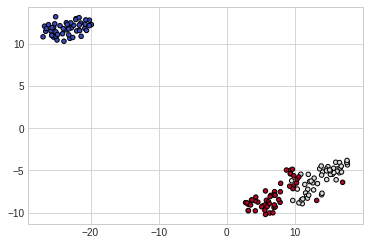

In [ ]:
plt.scatter(X_comp[:, 0], X_comp[:, 1],
            c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [ ]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
preduct = model.predict

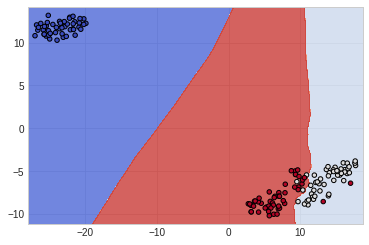

In [ ]:
xx, yy = make_meshgrid(X_comp[:,0], X_comp[:,1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

#sklearn 데이터 전처리 스케일 조정

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=demian7607&logNo=222009975984

많은 상황에서 데이터 스케일 조정이 필요한 경우가 있다

예를들어
* 분석시에 변수들이 너무 스케일이 다를 경우
  * 변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우

* 신경망 학습시에
  * 데이터셋의 값이 들쑥날쑥하거나, 매우 큰 경우에는 cost의 값이 발산하여 정상적인 학습이 이루어지지 않는다

스케일링은 다차원의 값들을 비교 분석하기 쉽게 만들어주며, 자료의 오버플로우(overflow)나 언더플로우(underflow)를 방지 하고, 독립 변수의 공분산 행렬의 조건수(condition number)를 감소시켜 최적화 과정에서의 안정성 및 수렴 속도를 향상 시킨다.

특히 k-means 등 거리 기반의 모델에서는 스케일링이 매우 중요하다.

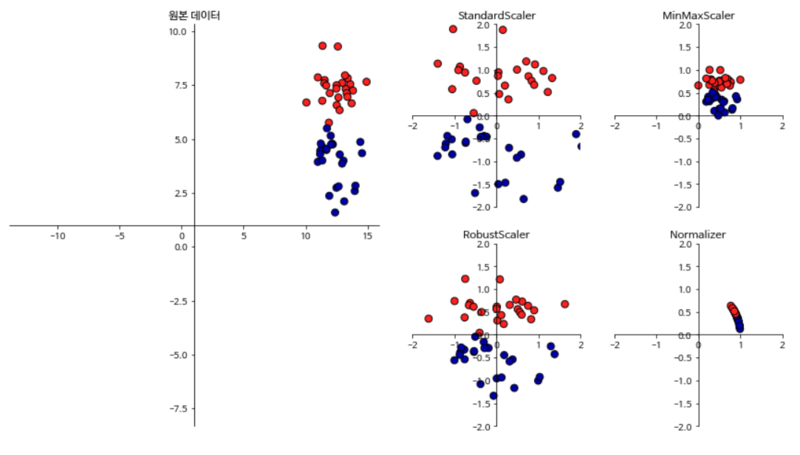

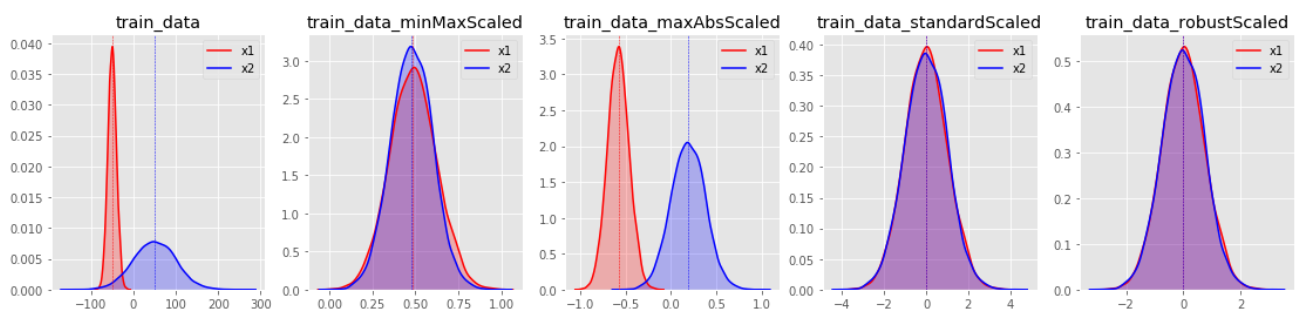

Scikit-Learn 에서는 다양한 종류의 스케일러를 제공하고있다.

1. StandardScaler : 기본 스케일. 평균과 표준편차 사용
2. MinMaxScaler : 최대 / 최소값이 각각 1, 0이 되도록 스케일링
3. MaxAbsScaler : 최대절대값과 0이 각각 1, 0이 되도록 스케일링
4. RobustScaler : 중앙값(median)과 IQR(interquartile range) 사용, 아웃라이어의 영향을 최소화


## 1.StandardScaler





평균을 제거하고 데이터를 단위 분산으로 조정한다. 그러나 이상치가 있다면 평균과 표준편차에 영향을 미쳐 변환된 데이터의 확산은 매우 달라지게 된다.

따라서 이상치가 있는 경우 균형 잡힌 척도를 보장할 수 없다.

```
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
print(standardScaler.fit(train_data))
train_data_standardScaled = standardScaler.transform(train_data)

```


##2.MinMaxScaler


모든 feature 값이 0~1사이에 있도록 데이터를 재조정한다. 다만 이상치가 있는 경우 변환된 값이 매우 좁은 범위로 압축될 수 있다.

즉, MinMaxScaler 역시 아웃라이어의 존재에 매우 민감하다.



```
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
print(minMaxScaler.fit(train_data))
train_data_minMaxScaled = minMaxScaler.transform(train_data)
```



## 3.MaxAbsScaler


절대값이 0부터 1사이에 매핑되도록 한다. 즉 -1부터 1 사이로 재조정한다. 

양수 데이터로만 구성된 특징 데이터셋에서는 MinMaxScaler와 유사하게 동작하며, 큰 이상치에 민감할 수 있다.



```
from sklearn.preprocessing import MaxAbsScaler
maxAbsScaler = MaxAbsScaler()
print(maxAbsScaler.fit(train_data))
train_data_maxAbsScaled = maxAbsScaler.transform(train_data)

```



##4.RobustScaler


아웃라이어의 영향을 최소화한 기법이다. 중앙값(median)과 IQR(interquartile range)을 사용하기 때문에 StandardScaler와 비교해보면 표준화 후 동일한 값을 더 넓게 분포 시키고 있음을 확인 할 수 있다.

IQR = Q3 - Q1 : 즉, 25퍼센타일과 75퍼센타일의 값들을 다룬다.

아웃라이어를 포함하는 데이터의 표준화 결과는 아래와 같다.

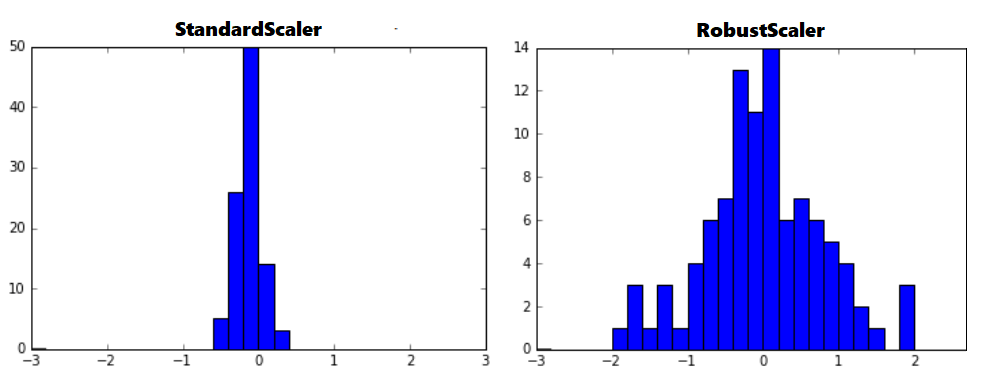



```
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
print(robustScaler.fit(train_data))
train_data_robustScaled = robustScaler.transform(train_data)

```



결론적으로 모든 스케일러 처리 전에는 아웃라이어 제거가 선행되어야 한다. 또한 데이터의 분포 특징에 따라 적절한 스케일러를 적용해주는 것이 좋다.



#다시정리한 Bayesian Networks(베이즈 네트워크)

## Bayes' Theorem(베이즈 정리)

https://hleecaster.com/bayes-theorem-concept/

기본적으로 확률 계산이란 1번사건이 발생할 확률 * 2번사건이 발생할 확률  을 하면되는데 베이지안의 관점에서 본다 그러면 과거에 다른 사건이 발생했다는 전제 하에 확률을 계산하는 방식이다

예를 들어보자.

**희귀병**

만약 어떤 환자가 10만명 중 1명 꼴로 발생하는 희귀병이 의심되어서, 진단 정확도 99%의 검사를 받았고, 그 결과 희귀병으로 진단이 내려졌다고 하자. 이 때 그 환자가 정말로 희귀병일 확률은 어떻게 될까?

빈도주의적 관점에서는 일반적인 희귀병 발병률이 10만분의 1이고 검사의 정확도는 99%니까 1/100000 × 0.99로 계산해서 이 환자가 정말 희귀병을 가지고 있을 확률이 0.0000099라고 결론을 내린다.


베이지안 관점

베이지안 관점에서는 조건부 확률로 계산해야한다. 희귀병 검사 결과가 양성인데, 정말 그러한지 확인하는 관점이다.
$$P(A|B) = \frac{P(B|A)⋅ P(A)}{P(B)}$$

$$P(\text{rare disease | positive result}) = \frac {P(\text{positive result|rare disease}) \cdot P(\text{rare disease})}{P(\text{positive result})} $$


여기서 분모는 ‘검사결과가 양성’인 경우니까, 두 가지 경우를 생각해서 그 확률을 더해야 한다.

* 환자가 희귀병을 가지고 있고, 검사 결과가 정확한 경우 : (1/100000) * 0.99
* 환자는 희귀병을 가지고 있지 않은데, 검사 결과가 잘못된 경우 : (99999 / 100000) * 0.01

0.0100098가 나온다.

분자는 희귀병 환자에 대한 검사 정확도(0.99)와 희귀병 발병률(1/100000)을 곱해주면 된다.

아무튼 이렇게 구한 값은 약 0.0009890으로, 단순히 검사 정확도와 발병률을 곱한 값인 0.0000099 보다 높다.



**스팸 필터**

이번엔 “OO”이라는 단어가 메일에 포함되어 있을 때, 그 메일이 spam일 확률을 구하는 거다. (spam의 반댓말은 ham)

“OO”이라는 단어는 ham에서 0.1% 정도의 확률로 등장한다.
“OO”이라는 단어는 spam에서 5% 정도의 확률로 등장한다.
전체 메일의 20%는 spam이다. (80%는 ham이다.)
내가 받은 메일에서 “OO”이라는 단어를 발견했다. 이 메일이 spam일 확률은?

그러면 여기서 분모는 “OO”이 포함된 메일을 받을 확률이다.

spam에서 “OO”이 등장할 확률 : 0.2 * 0.05 + 
ham에서 “OO”이 등장할 확률 : 0.8 * 0.001

분자는 

spam에서 “OO”이 등장할 확률(0.05)과 spam을 받을 확률(0.2)을 곱해주면 된다.

구해보니 92.6% 정도 된다.



1번 사건과 2번 사건에 a라는 특성이 확률적으로 들어 있다고 할때 1번 사건 안에 a라는 특성이 들어있을 확률 을 베이지안 관점으로 구해보자


분모는 : a라는 특성이 들어있을 확률을 전부 구해서 더한다 

(1번 사건이 발생할확률 * 1번 사건 안에 a라는 특성이 들어있을 확률) + (2번 사건이 발생할 확률 * 2번 사건 안에 a라는 특성이 들어있을 확률) 

분자는 : 1번 사건 안에 a라는 특성이 들어있을 확률

(1번 사건이 발생할 확률 * 1번 사건안에 a라는 특성이 들어있을 확률)

## Naive Bayes(나이브 베이즈)

공식부터 다시 살펴보자

$$P(A|B) = \frac{P(B|A)⋅ P(A)}{P(B)}$$

B라는 조건이 주어졌을때 A의 확률을 구하는거다

그런데 여기서 만약 B를 데이터라고 생각하고, A를 레이블이라고 생각하면 일종의 분류기가 되는 셈이다

B라는 데이터가 주어졌을때 A라는 레이블로 분류될 확률을 계산하는 것이다.

한가지 예시를 통해 배워보자

특정 쇼핑몰에 새로 작성된 리뷰를 읽고, 그게 긍정 리뷰인지 부정 리뷰인지 분류하는 예를 살펴보자



“침대가 정말 부드럽다”라는 텍스트가 positve 리뷰인지 분류하려면 베이즈 정리를 바탕으로 계산한다.


$$P(positive|review) = \frac {P(review|positive)\cdot P(positive)}{P(review)}$$

하나하나씩 뜯어보자

P(positive)는 전체 리뷰 문서 중 positive 리뷰가 등장할 확률이다

P(review|positive) 는 “침대가 정말 부드럽다”라는 텍스트가 positive 리뷰에서 등장할 확률을 의미한다.

P(review) 는 전체 리뷰 문서 중(positive와 negative 둘다 포함된) "침대가 정말 부드럽다" 라는 텍스트가 등장할 확률이다.

여기서 P(review|positive) 는 해당 텍스트에서 각 단어가 positive 리뷰에 등장할 확률이다 이게 무슨소리냐 하면 "침대가", "정말", "부드럽다" 로 단어들을 놓고 각각의 단어가 모두 등장할 확률이라는 것이다

여기서 이걸 찾으려면 각 단어들이 등장할 확률은 독립적이다 라는 가정을 해야한다
즉 한 단어("침대가")가 등장하는게 다른 단어("정말" 혹은 "부드럽다")가 나타날 확률에 영향을 미치지 않는다는 것이다

계산식으로 표현해보자면 

P("침대가 정말 부드럽다" ∣ positive) = P("침대가" ∣ positive) ⋅ P("정말" ∣ positive) ⋅ P("부드럽다" ∣ positive)

즉, 각 단어가 positive 리뷰에서 등장할 확률을 곱해주는것이다

예를 들어 P("침대가" ∣ positive)는 positive 리뷰 데이터의 전체 단어 중 “침대가”라는 단어의 비율이 될 거다.



### 스무딩(smoothing)

그러나 만약 “침대가”라는 단어가 긍정 리뷰 데이터 세트에서 한 번도 등장하지 않은 단어라면 어떻게 될까? 

이 경우 P("침대가" ∣ positive) 값은 0이 되기 때문에 P("이 침대는 정말 부드럽다" ∣ positive)까지 0이 되어 버린다. 아주 희귀한(?) 단어나 오타 같은 게 있을 때 특히 문제다.

그래서 이 문제를 해결하기 위해 스무딩(smoothing)이라는 기술을 사용해야 한다.

분자에는 1을 더하고 분모에는 N을 더해서 부드럽게(?) 만들어주는 거다. 여기서 N은 데이터 세트에 등장하는 고유 단어 개수다.




P(review)는 리뷰 텍스트가 positive라고 가정하지 않는다는 차이만 있는 것이다.

그리고 어차피 여기서는 positive 아니면 negative로 분류될 거라서, 각각의 레이블로 분류될 확률을 계산하고 비교하게 될 것이다

$$P(positive|review) = \frac {P(review|positive)\cdot P(positive)}{P(review)}$$

$$P(negative|review) = \frac {P(review|negative)\cdot P(negative)}{P(review)}$$

하지만 식을 보면 알수있듯이 분모는 어차피 동일하므로 무시해도 된다

##예제

### CounterVectorizer

scikit-learn에서 Naive Bayes 분류기를 사용하기 전에 일단 자연어(텍스트)로 이루어진 문서들을 1과 0밖에 모르는 컴퓨터가 이해할수 있는 형식으로 변환해야 한다. feature, **어휘(특성) 추출** 과정이라 볼수있다

* .fit()

일단 CountVectorizer라는 객체를 만든 후, fit() 메소드를 호출해서 학습 데이터 세트에 등장하는 어휘를 가르쳐놓아야 한다.

예를 들어 아래와 같이 코드를 작성하면

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(["첫번째 문서 테스트", "두번째 문서 테스트"])

CountVectorizer()

“첫번째”, “문서”, “테스트”, “두번째” 이렇게 총 4개의 어휘를 학습한 CountVectorizer를 만들게 된다.

못 믿겠다면 vectorizer.vocabulary_를 출력해보면 된다. 이렇게 뜰 거다.



In [3]:
print(vectorizer.vocabulary_)

{'첫번째': 2, '문서': 1, '테스트': 3, '두번째': 0}


고유한 어휘가 딕셔너리처럼 각각의 인덱스를 가지고 있다.



* .transform()


어휘 사전을 만들었으니 이제 .transform() 메서드를 호출할 수 있다. .transform()는 문자열 목록을 가져와 미리 학습해놓은 사전을 기반으로 어휘의 빈도를 세주는 거다.

아래와 같이 공백으로 구분되는 문자열로 가져와서 넣어주면




In [48]:
counts = vectorizer.transform (["직접 첫번째 테스트 두번째 테스트"])


counts에는 각 어휘가 등장한 빈도수가 저장되는 거다.



In [49]:
counts.toarray()

array([[1, 0, 1, 2]])

 counts.toarray()를 출력해보면 [[1 0 1 2]]와 같은 array를 볼 수 있다. 위에서 학습된 인덱스에 따라 개수를 세주었다. 그리고 “직접”이라는 단어는 애초에 사전에 등록된 단어가 아니기 때문에 고려하지 않는다.
(0이라고 세진 부분은 "테스트" 라는 단어가 앞에서 한번나온후 중복되었기에 0으로 생략되고 뒤에 테스트에 단어개수를 합쳐서 센것이다)

이렇게 텍스트를 컴퓨터가 이해할 수 있는 숫자들로 변환시켜놓은 셈이니 이제 나이브 베이즈를 본격적으로 사용해볼 수 있다.

###MultinomialNB(다항 나이브 베이즈)


영화리뷰가 긍정리뷰인지 부정리뷰인지 분류해보자

####1.데이터 획득

In [50]:
#라이브러리
import numpy as np
import pandas as pd
from sklearn. feature_extraction. text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever!', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
              ] 
df = pd. DataFrame (review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever!,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


####2.데이터 다듬기

다항 나이브 베이즈는 숫자만 다루기 때문에 positive와 negative를 1과 0으로 치환한다

map({:}) <- 데이터 치환

In [51]:
# positive는 1로 negative는 0으로 분류
df['label']=df['type'].map({'positive':1, 'negative':0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever!,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


영화 감상평(movie_review)로 학습을 진행하고, label을 이용해서 영화 감상평이 긍정적이었는지 부정적이었는지 판단한다.

In [52]:
df_x=df.movie_review
df_y=df.label

CountVectorizer()는 입력된 10개의 감상평에 출현한 모든 단어 개수만큼의 크기를 가진 벡터를 만들고, 각 감상평을 고정된 벡터로 표현한다. 

영화 감상평에 단어가 나타나지 않으면 0 , 나타나면 (나타난 횟수)를 표시한다.

In [53]:
cv=CountVectorizer()

In [62]:
x_traincv=cv.fit_transform(df_x)

encoded_input = x_traincv.toarray()
encoded_input


array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

10개의 감상평이 총 37개 단어의 출현 횟수로 표현된 벡터로 인코딩 된것을 확인할 수 있다

37개의 인덱스가 각각 무슨 단어를 의미하는지 확인해보자

In [63]:
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

####3.다항 나이브 베이즈 모델 학습

In [64]:
mnb=MultinomialNB()
y_train = df_y.astype('int')
mnb.fit(x_traincv, y_train)

MultinomialNB()

####4.테스트 데이터 다듬기

학습 데이터와 다른 리뷰를 테스트 데이터로 넣어준다

In [21]:
test_feedback_list = [
                      {'movie_review': 'great great great movie ever','type': 'positive'},
                      {'movie_review': 'I like this amazing movie','type': 'positive'},
                      {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                      {'movie_review': 'cool cool cool', 'type': 'positive'},
                      {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                      {'movie_review': 'shame shame shame', 'type': 'negative'},
                      {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                      {'movie_review': 'do not like this movie', 'type': 'negative'},
                      {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                      {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
                     ]
test_df = pd.DataFrame(test_feedback_list)
test_df

,movie_review,type
0,great great great movie ever,positive
1,I like this amazing movie,positive
2,my boyfriend said great movie ever,positive
3,cool cool cool,positive
4,awesome boyfriend said cool movie ever,positive
5,shame shame shame,negative
6,awesome director shame movie boring movie,negative
7,do not like this movie,negative
8,I do not like this boring movie,negative
9,aweful terrible boring movie,negative


학습 데이터와 마찬가지로, 사이킷런의 다항 나이브 베이즈 분류기는 숫자만 다루기 때문에 positive 와 negative를 1과 0으로 치환한다.

In [22]:
test_df['label'] = test_df['type'].map({"positive":1,"negative":0})
test_df

,movie_review,type,label
0,great great great movie ever,positive,1
1,I like this amazing movie,positive,1
2,my boyfriend said great movie ever,positive,1
3,cool cool cool,positive,1
4,awesome boyfriend said cool movie ever,positive,1
5,shame shame shame,negative,0
6,awesome director shame movie boring movie,negative,0
7,do not like this movie,negative,0
8,I do not like this boring movie,negative,0
9,aweful terrible boring movie,negative,0


In [24]:
test_x = test_df["movie_review"]
test_y = test_df["label"]

#테스트
x_testcv = cv.transform(test_x)
predictions = mnb.predict(x_testcv)

accuracy_score(test_y, predictions)

1.0

모델의 정확도가 100% 인것을 확인할수 있다

### MultinomialNB_20Newsgroup

In [68]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.datasets import fetch_covtype, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

* 뉴스 기사가 어느 그룹에 속하는지 분류
* 뉴스 기사는 텍스트 데이터이기 때문에 특별한 전처리 과정이 필요

#### 학습, 평가 데이터 분류

In [70]:
newsgroup_train = fetch_20newsgroups(subset='train')
newsgroup_test = fetch_20newsgroups(subset='test')

In [71]:
X_train, y_train = newsgroup_train.data, newsgroup_train.target
X_test, y_test = newsgroup_test.data, newsgroup_test.target

#### 벡터화

* 텍스트 데이터는 기계학습 모델에 입력 할 수 없음
* 벡터화는 텍스트 데이터를 실수 벡터로 변환해 기계 학습 모델에 입력 할 수 있도록 하는 전처리 과정
* Scikit-learnd 에서는 Count, Tf-idf, Hashing 세가지 방법을 지원

#### CountVectorizer

* 문서에 나온 단어의 수를 세서 벡터 생성

In [72]:
count_vectorizer = CountVectorizer()

In [73]:
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

#### 학습 및 평가 (Count)

In [76]:
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [77]:
predict = model.predict(X_train_count)
acc = metrics.accuracy_score(y_train, predict)
f1 = metrics.f1_score(y_train, predict, average=None)

print('Train Accuracy: {}'.format(acc))
print('Train F1 Score: {}'.format(f1))

Train Accuracy: 0.9245182959165635
Train F1 Score: [0.95228426 0.904      0.25073746 0.81402003 0.96669513 0.88350983
 0.90710383 0.97014925 0.98567818 0.99325464 0.98423237 0.95399516
 0.95703454 0.98319328 0.98584513 0.95352564 0.97307002 0.97467249
 0.95157895 0.86526946]


In [78]:
predict = model.predict(X_test_count)
acc = metrics.accuracy_score(y_test, predict)
f1 = metrics.f1_score(y_test, predict, average=None)

print('Train Accuracy: {}'.format(acc))
print('Train F1 Score: {}'.format(f1))

Train Accuracy: 0.7728359001593202
Train F1 Score: [0.77901431 0.7008547  0.00501253 0.64516129 0.79178082 0.73370166
 0.76550681 0.88779285 0.93951094 0.91390728 0.94594595 0.78459938
 0.72299169 0.84635417 0.86029412 0.80846561 0.78665077 0.89281211
 0.60465116 0.48695652]
